__Title:__ Lab 1: Visualization and Data Preprocessing  
__Authors:__ Butler, Derner, Holmes, Traxler  
__Date:__ 1/22/23 

## Ruberic

|Category | Points | Description |
| --- | --- | --- |
| Business Understanding | 10 | Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.
| Data Meaning Type | 10 | Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
| Data Quality | 15 | Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.
| Simple Statistics | 10 | Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 
| Visualize Attributes | 15 | Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.
| Explore Joint Attributes | 15 | Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.
| Explore Attributes and Class | 10 | Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).
| New Features | 5 | Are there other features that could be added to the data or created from existing features? Which ones?
| Exceptional Work | 10 | You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.
| Total	| 100


## Business Understanding
We've selected a data source from Kaggle that is focused on predicting flight delays/cancelations and the length of time delayed. The original data set comes from the "Marketing Carrier On-Time Performance data table of the "On-Time" database from the TranStats data library" (Kaggle, 2022). For the purposes of this exercise, we have limited the scope to 2022. In this Lab, we will be highlighting our relevant findings during out initial expoloration of the data set. Predicitive models for regression and classificaiton will be thouroughly reviewed in Lab 2.

According to research, 2007 United States flight delays and cancelations had an estimated total cost of $32.9 billion (Ball et al., 2010). Airlines and passengers accounted for $8.3 billion and $16.7 billion repspectively. The remaining $3.9 billion was due to lost demand. These 2007 figures highlight the staggering cost to airlines and customers, but do nothing to quantify the tanjential losses faced by customers. A delayed or canceled flight can result in critical meetings missed, the loss of final moments with a loved one, or experiences never lived. Just last Christmas, we witnessed Southwest Airlines ground and cancel thousands of flights due to weather cancellations and outdated computer systems (Olson, 2022). According to a recent financial report to the SEC (Investis, 2023), Southwest is estimating a loss of up to $825 million. While this loss is significant, it can not begin to quantify the time lost with loved ones and the experiences missed by customers.

The numbers outlined above are sufficent to unerpin the importance of this study from a business perspective. However, beyond the business, we've also highlighted the intagiable costs of delays and cancelations to customers. Throughout this study, we will be reviewing the data and seeking to answer the most important questions from each perspective.

Data Source:
https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Workbook settings
pd.set_option('display.max_columns', None)

In [3]:
# Import data
file_load = "data/Combined_Flights_2022.csv"
flight_data_df = pd.read_csv(file_load, encoding = "utf-8")

## Data Meaning Type

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

__Feature Definitions__  

Definitions sourced from Kaggle dataset documentation (Kaggle, 2022).

| Response Features | Definition                                                                                                 |
| ----------------- | ---------------------------------------------------------------------------------------------------------- |
| Cancelled         | Cancelled Flight Indicator (1=Yes)                                                                         |
| DepDelay          | Difference in minutes between scheduled and actual departure time. Early departures set to 0.              |
| DepDelayMinutes   | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers. |

| Categorical Features                    | Definition                                                                                                                                                                                                                                             |
| --------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Airline                                 | Airline                                                                                                                                                                                                                                                |
| ArrTimeBlk                              | CRS Arrival Time Block, Hourly Intervals                                                                                                                                                                                                               |
| Cancelled                               | Cancelled Flight Indicator (1=Yes)                                                                                                                                                                                                                     |
| DepartureDelayGroups                    | Departure Delay intervals, every (15 minutes from <-15 to >180)                                                                                                                                                                                        |
| DepDel15                                | Departure Delay Indicator, 15 Minutes or More (1=Yes)                                                                                                                                                                                                  |
| DepTimeBlk                              | CRS Departure Time Block, Hourly Intervals                                                                                                                                                                                                             |
| Dest                                    | Destination Airport                                                                                                                                                                                                                                    |
| DestAirportID                           | Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused. |
| DestAirportSeqID                        | Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.                            |
| DestCityMarketID                        | Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.                                                     |
| DestCityName                            | Destination Airport, City Name                                                                                                                                                                                                                         |
| DestState                               | Destination Airport, State Code                                                                                                                                                                                                                        |
| DestStateFips                           | Destination Airport, State Fips                                                                                                                                                                                                                        |
| DestStateName                           | Destination Airport, State Name                                                                                                                                                                                                                        |
| DestWac                                 | Destination Airport, World Area Code                                                                                                                                                                                                                   |
| Diverted                                | Diverted Flight Indicator (1=Yes)                                                                                                                                                                                                                      |
| DOT_ID_Marketing_Airline                | An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.    |
| DOT_ID_Operating_Airline                | An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.    |
| Flight_Number_Marketing_Airline         | Flight Number                                                                                                                                                                                                                                          |
| Flight_Number_Operating_Airline         | Flight Number                                                                                                                                                                                                                                          |
| IATA_Code_Marketing_Airline             | Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.                                      |
| IATA_Code_Operating_Airline             | Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.                                      |
| Marketing_Airline_Network               | Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.                                  |
| Operated_or_Branded_Code_Share_Partners | Reporting Carrier Operated or Branded Code Share Partners                                                                                                                                                                                              |
| Operating_Airline                       | Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.                                            |
| Origin                                  | Origin Airport                                                                                                                                                                                                                                         |
| OriginAirportID                         | Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.      |
| OriginAirportSeqID                      | Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.                                 |
| OriginCityMarketID                      | Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.                                                          |
| OriginCityName                          | Origin Airport, City Name                                                                                                                                                                                                                              |
| OriginState                             | Origin Airport, State Code                                                                                                                                                                                                                             |
| OriginStateFips                         | Origin Airport, State Fips                                                                                                                                                                                                                             |
| OriginStateName                         | Origin Airport, State Name                                                                                                                                                                                                                             |
| OriginWac                               | Origin Airport, World Area Code                                                                                                                                                                                                                        |
| Tail_Number                             | Tail Number                                                                                                                                                                                                                                            |

| Continuous Features | Definition                                                                                                 |
| ------------------- | ---------------------------------------------------------------------------------------------------------- |
| ActualElapsedTime   | Elapsed Time of Flight, in Minutes                                                                         |
| AirTime             | Flight Time, in Minutes                                                                                    |
| ArrDel15            | Arrival Delay Indicator, 15 Minutes or More (1=Yes)                                                        |
| ArrDelay            | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.     |
| ArrDelayMinutes     | Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.                  |
| ArrivalDelayGroups  | Arrival Delay intervals, every (15-minutes from <-15 to >180)                                              |
| ArrTime             | Actual Arrival Time (local time: hhmm)                                                                     |
| CRSArrTime          | CRS Arrival Time (local time: hhmm)                                                                        |
| CRSDepTime          | CRS Departure Time (local time: hhmm)                                                                      |
| CRSElapsedTime      | CRS Elapsed Time of Flight, in Minutes                                                                     |
| DepDelay            | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers. |
| DepDelayMinutes     | Difference in minutes between scheduled and actual departure time. Early departures set to 0.              |
| DepTime             | Actual Departure Time (local time: hhmm)                                                                   |
| Distance            | Distance between airports (miles)                                                                          |
| DivAirportLandings  | Number of Diverted Airport Landings                                                                        |
| TaxiIn              | Taxi In Time, in Minutes                                                                                   |
| TaxiOut             | Taxi Out Time, in Minutes                                                                                  |
| WheelsOff           | Wheels Off Time (local time: hhmm)                                                                         |
| WheelsOn            | Wheels On Time (local time: hhmm)                                                                          |

| Ordinal Features | Definition    |
| ---------------- | ------------- |
| Year             | Year          |
| Quarter          | Quarter (1-4) |
| Month            | Month         |
| DayofMonth       | Day of Month  |
| DayOfWeek        | Day of Week   |

# Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [5]:
flight_data_df.shape

(4078318, 61)

__Missing Values__

In [6]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(flight_data_df[flight_data_df.columns[flight_data_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / flight_data_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent
0,DepTime,120433,2.95
1,DepDelayMinutes,120495,2.95
2,DepDelay,120495,2.95
3,ArrTime,124239,3.05
4,ArrDelayMinutes,133402,3.27
5,AirTime,133402,3.27
6,ActualElapsedTime,133402,3.27
7,Tail_Number,26795,0.66
8,DepDel15,120495,2.95
9,DepartureDelayGroups,120495,2.95


It appears that many of the features with missing values have the same count of missing values. These features in particular would likely not be available for cancelled flights. To test that theory, we created the same table filtered only to cancelled flights. 

In the three subsequent tables, we show the null values associated with non-cancelled flights and then flights that were diverted. The results show the exact same number of missing values across every feature. When we combine the filters to show missing values for observations that were neither cancelled nor diverted, there are no more missing values.

These findings show that all missing values are related in full to the response feature 'Cancelled' or 'Diverted'. No missing values will be dropped or imputed for this data set.

In [7]:
# Non-cancelled flights with null values
null_df = pd.DataFrame(flight_data_df[(flight_data_df['Cancelled'] == False)][flight_data_df.columns[flight_data_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / flight_data_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent
0,DepTime,0,0.00
1,DepDelayMinutes,0,0.00
2,DepDelay,0,0.00
3,ArrTime,1047,0.03
4,ArrDelayMinutes,10210,0.25
5,AirTime,10210,0.25
6,ActualElapsedTime,10210,0.25
7,Tail_Number,0,0.00
8,DepDel15,0,0.00
9,DepartureDelayGroups,0,0.00


In [114]:
# Diverted flights with null values
null_df = pd.DataFrame(flight_data_df[(flight_data_df['Diverted'] == True)][flight_data_df.columns[flight_data_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / flight_data_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent
0,DepTime,0,0.00
1,DepDelayMinutes,0,0.00
2,DepDelay,0,0.00
3,ArrTime,1047,0.03
4,ArrDelayMinutes,10210,0.25
5,AirTime,10210,0.25
6,ActualElapsedTime,10210,0.25
7,Tail_Number,0,0.00
8,DepDel15,0,0.00
9,DepartureDelayGroups,0,0.00


In [8]:
# Cancelled and Diverted flights with null values
null_df = pd.DataFrame(flight_data_df[(flight_data_df['Cancelled'] == False) & (flight_data_df['Diverted'] == False)][flight_data_df.columns[flight_data_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / flight_data_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent
0,DepTime,0,0.0
1,DepDelayMinutes,0,0.0
2,DepDelay,0,0.0
3,ArrTime,0,0.0
4,ArrDelayMinutes,0,0.0
5,AirTime,0,0.0
6,ActualElapsedTime,0,0.0
7,Tail_Number,0,0.0
8,DepDel15,0,0.0
9,DepartureDelayGroups,0,0.0


__Duplicate Values__
There are no duplicate values in the data set. No action was needed.

In [9]:
# Duplicate record validation
flight_data_df.duplicated().sum()

0

__Data Type Conversion__
In this section we grouped all features by their correct data type and converted each to their coresponding group. 

In [10]:
flight_data_df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,1228.0,0.0,40.0,72.0,65.0,212.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4301,C5,20445,C5,N21144,4301,11921,1192102,31921,"Grand Junction, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1100-1159,17.0,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,848.0,0.0,55.0,77.0,80.0,295.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4299,C5,20445,C5,N16170,4299,12206,1220605,32206,"Harlingen/San Benito, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.0,-1.0,0700-0759,16.0,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,1636.0,0.0,47.0,70.0,82.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4298,C5,20445,C5,N21144,4298,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1500-1559,21.0,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,1547.0,0.0,57.0,90.0,77.0,376.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4296,C5,20445,C5,N11184,4296,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,11973,1197302,31973,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,0.0,-1.0,1400-1459,16.0,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,1251.0,6.0,49.0,70.0,76.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4295,C5,20445,C5,N17146,4295,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,0.0,1100-1159,19.0,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [17]:
# Features grouped by data type
cat_features = ['Airline', 'ArrTimeBlk', 'Cancelled', 'DepartureDelayGroups', 'DepDel15', 'DepTimeBlk', 'Dest', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'Diverted', 'DOT_ID_Marketing_Airline', 'DOT_ID_Operating_Airline', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'Operating_Airline', 'Origin', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'Tail_Number']
cont_features = ['ActualElapsedTime', 'AirTime', 'ArrDel15', 'ArrDelay', 'ArrDelayMinutes', 'ArrivalDelayGroups', 'ArrTime', 'CRSArrTime', 'CRSDepTime', 'CRSElapsedTime', 'DepDelay', 'DepDelayMinutes', 'DepTime', 'Distance', 'DivAirportLandings', 'TaxiIn', 'TaxiOut', 'WheelsOff', 'WheelsOn']
ord_features = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek']
date_feature = ['FlightDate']

In [29]:
# Features converted to corresponding group type
flight_data_df[cat_features] = flight_data_df[cat_features].astype("string")
flight_data_df[ord_features] = flight_data_df[ord_features].astype(np.int64)
flight_data_df[cont_features] = flight_data_df[cont_features].astype(np.float64)
flight_data_df['FlightDate'] = pd.to_datetime(flight_data_df['FlightDate']).dt.date

In [30]:
flight_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  string 
 2   Origin                                   string 
 3   Dest                                     string 
 4   Cancelled                                string 
 5   Diverted                                 string 
 6   CRSDepTime                               float64
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [ ]:
# let's start by first changing the numeric values to be floats
# continous_features = ['','','','']


#change all numeric fields to one type for univariate analysis

In [ ]:
# an the ordinal values to be integers
# ordinal_features = ['','','','']

In [ ]:
# we won't touch these variables, keep them as categorical
#categ_features = ['','','','','']

In [ ]:
#use the "astype" function to change the variable type
#df[continous_features] = df[continous_features].astype(np.float64)
#df[ordinal_features] = df[ordinal_features].astype(np.int64)

#now the data should be treated better
#df.head()

In [36]:
#Separate Numerical and Categorical variables for easy analysis

cat_cols=flight_data_df.select_dtypes(include=['object']).columns
num_cols = flight_data_df.select_dtypes(include=np.number).columns.tolist()

print(cat_cols)
print(num_cols)

# Code reference from https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

Index(['FlightDate'], dtype='object')
['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings']


# Simple Statistics
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 


In [31]:
flight_data_df.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,4.078318e+06,3.957885e+06,3.957823e+06,3.957823e+06,3.954079e+06,3.944916e+06,3.944916e+06,4.078318e+06,3.944916e+06,4.078318e+06,4078318.0,4.078318e+06,4.078318e+06,4.078318e+06,4.078318e+06,3.955652e+06,3.955652e+06,3.954076e+06,3.954076e+06,4.078318e+06,3.944916e+06,3.944916e+06,3.944916e+06,4.078318e+06,4.078318e+06
mean,1.329587e+03,1.334374e+03,1.601494e+01,1.309049e+01,1.457886e+03,1.578307e+01,1.110075e+02,1.413211e+02,1.358624e+02,7.978657e+02,2022.0,1.741207e+00,4.083803e+00,1.571131e+01,4.005566e+00,1.697375e+01,1.356576e+03,1.455073e+03,7.894387e+00,1.486058e+03,7.528486e+00,2.164715e-01,-6.256103e-02,3.663516e+00,3.685098e-03
std,4.904801e+02,5.056219e+02,5.231498e+01,5.332016e+01,5.431841e+02,5.198424e+01,6.996246e+01,7.179635e+01,7.185501e+01,5.914742e+02,0.0,7.037563e-01,1.998918e+00,8.760122e+00,2.007050e+00,9.495407e+00,5.075580e+02,5.378428e+02,6.663118e+00,5.185078e+02,5.524625e+01,4.118393e-01,2.487442e+00,2.320848e+00,1.141331e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-7.800000e+01,1.000000e+00,0.000000e+00,8.000000e+00,-4.800000e+01,1.400000e+01,3.100000e+01,2022.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+02,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.140000e+02,9.170000e+02,0.000000e+00,-5.000000e+00,1.046000e+03,0.000000e+00,6.000000e+01,8.900000e+01,8.300000e+01,3.680000e+02,2022.0,1.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,1.100000e+01,9.320000e+02,1.044000e+03,4.000000e+00,1.103000e+03,-1.400000e+01,0.000000e+00,-1.000000e+00,2.000000e+00,0.000000e+00
50%,1.320000e+03,1.325000e+03,0.000000e+00,-2.000000e+00,1.500000e+03,0.000000e+00,9.400000e+01,1.240000e+02,1.190000e+02,6.430000e+02,2022.0,2.000000e+00,4.000000e+00,1.600000e+01,4.000000e+00,1.500000e+01,1.338000e+03,1.456000e+03,6.000000e+00,1.513000e+03,-5.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.735000e+03,1.744000e+03,1.100000e+01,1.100000e+01,1.914000e+03,1.000000e+01,1.410000e+02,1.710000e+02,1.670000e+02,1.035000e+03,2022.0,2.000000e+00,6.000000e+00,2.300000e+01,6.000000e+00,1.900000e+01,1.758000e+03,1.909000e+03,9.000000e+00,1.920000e+03,1.000000e+01,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,7.223000e+03,7.223000e+03,2.400000e+03,7.232000e+03,7.270000e+02,6.900000e+02,7.640000e+02,5.095000e+03,2022.0,3.000000e+00,7.000000e+00,3.100000e+01,7.000000e+00,2.210000e+02,2.400000e+03,2.400000e+03,2.900000e+02,2.359000e+03,7.232000e+03,1.000000e+00,1.200000e+01,1.100000e+01,9.000000e+00


# Visualize Attributes
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.


In [33]:
#load grpahing package
import seaborn as sns

CRSDepTime
Skew : 0.09


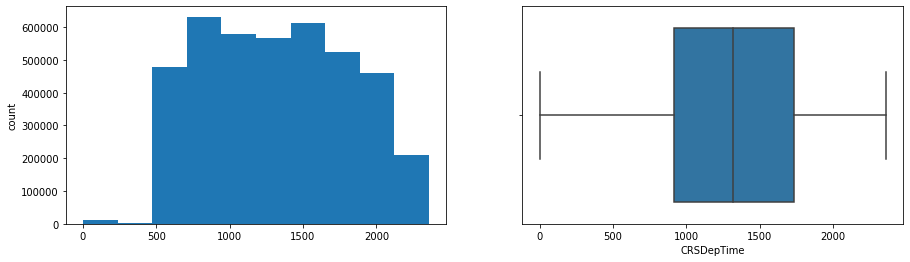

DepTime
Skew : 0.04


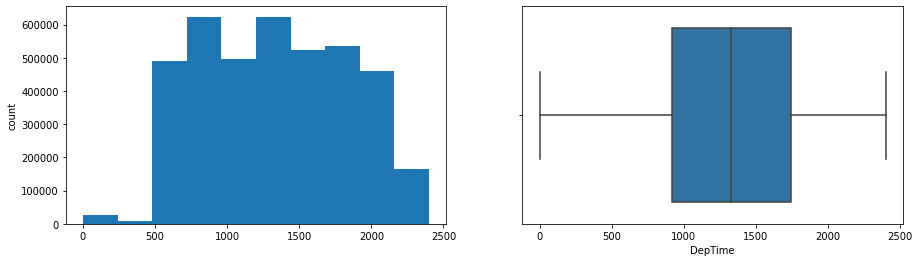

DepDelayMinutes
Skew : 11.95


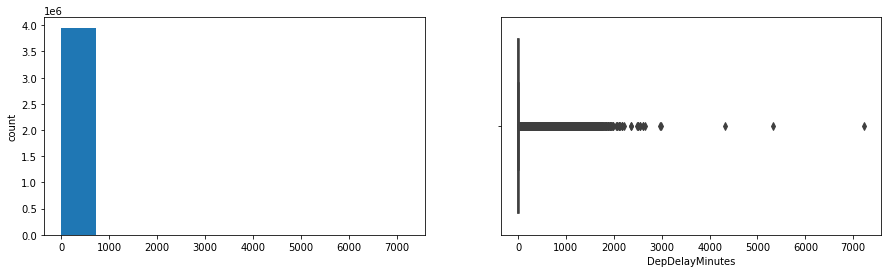

DepDelay
Skew : 11.43


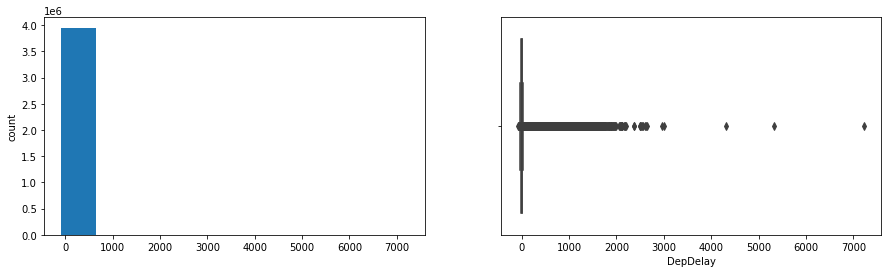

ArrTime
Skew : -0.38


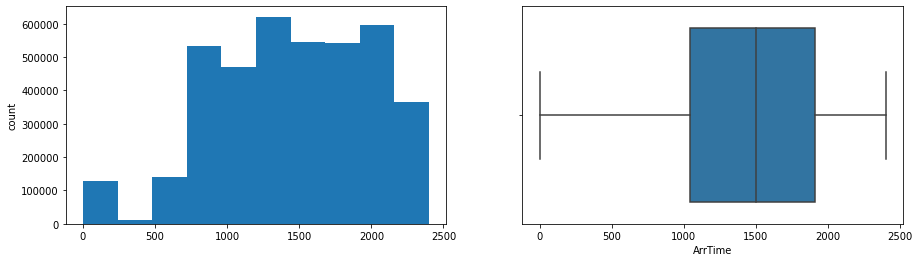

ArrDelayMinutes
Skew : 12.04


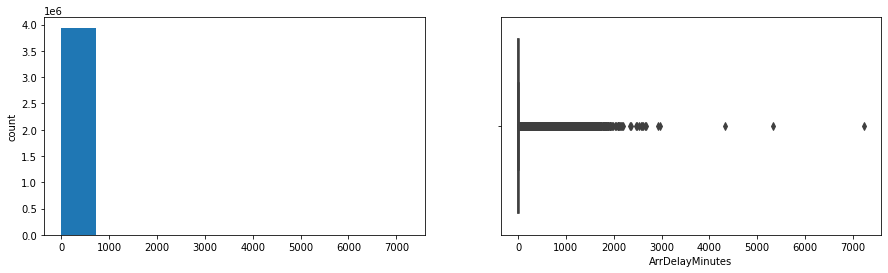

AirTime
Skew : 1.48


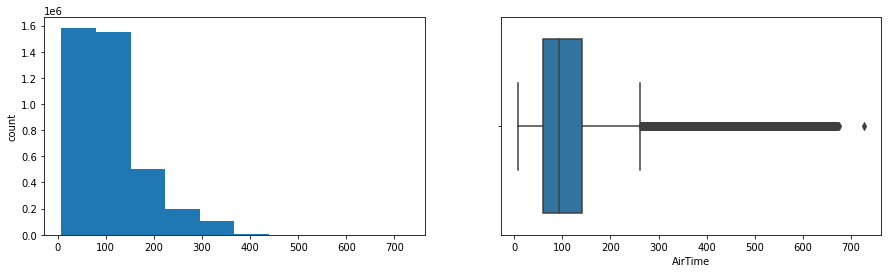

CRSElapsedTime
Skew : 1.47


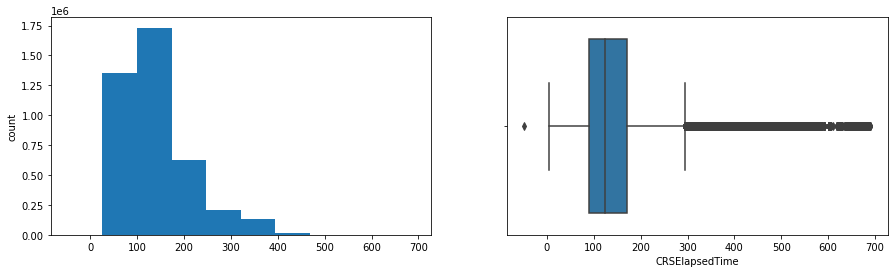

ActualElapsedTime
Skew : 1.44


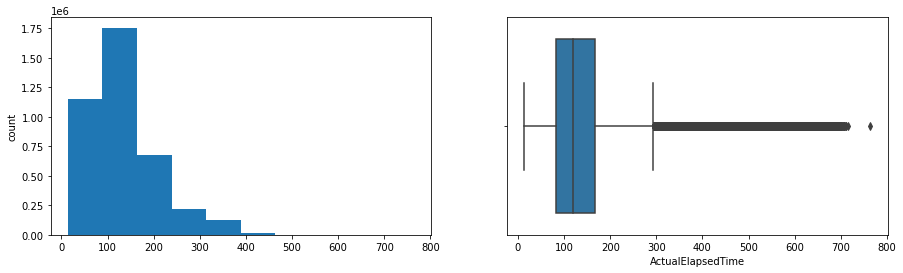

Distance
Skew : 1.55


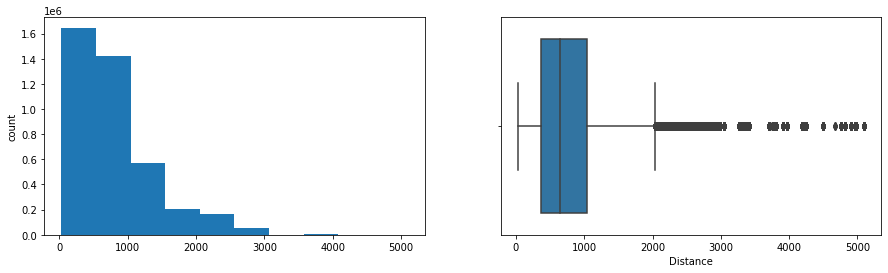

Year
Skew : 0


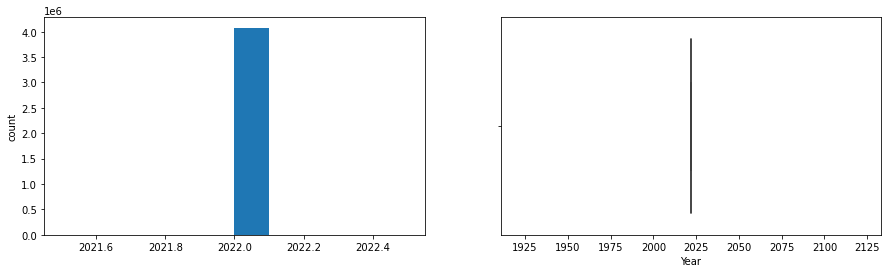

Quarter
Skew : 0.41


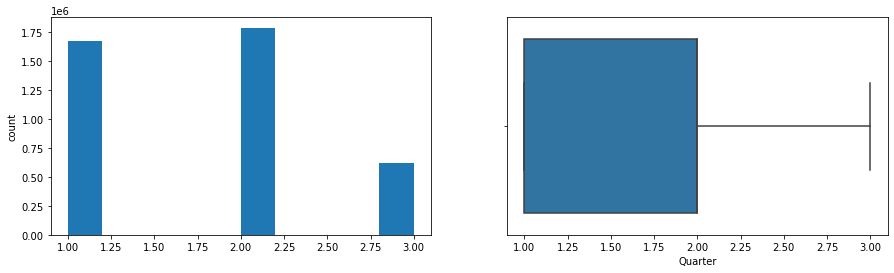

Month
Skew : -0.06


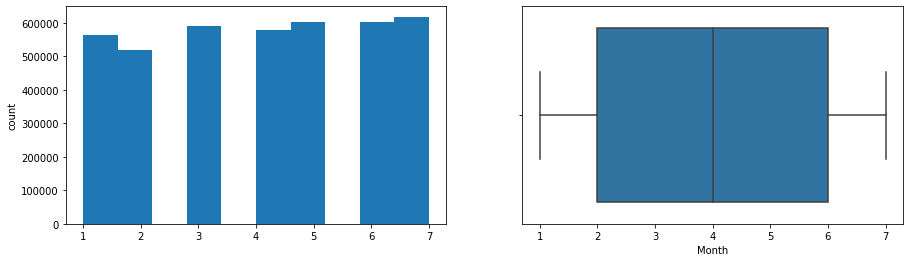

DayofMonth
Skew : 0.0


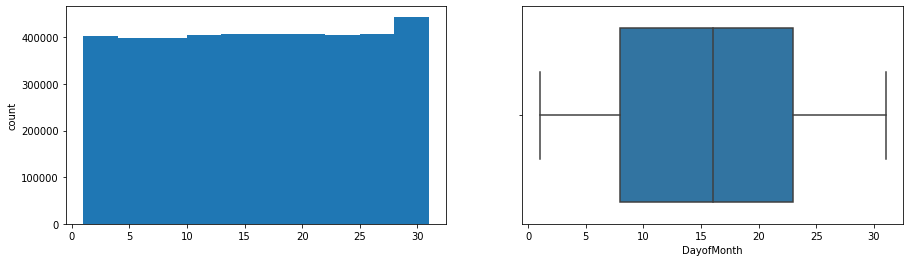

DayOfWeek
Skew : -0.01


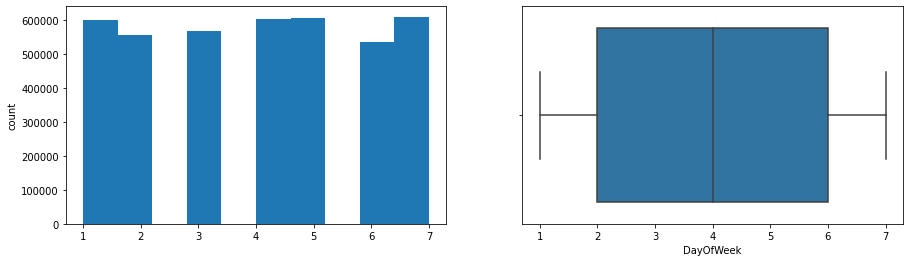

TaxiOut
Skew : 3.63


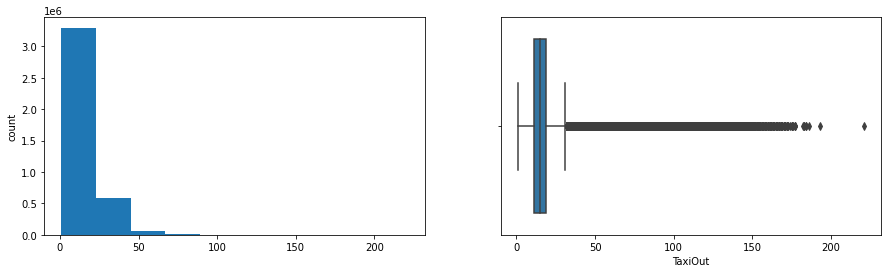

WheelsOff
Skew : 0.0


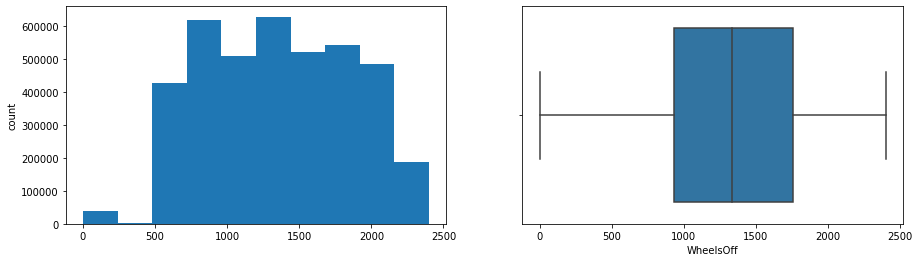

WheelsOn
Skew : -0.34


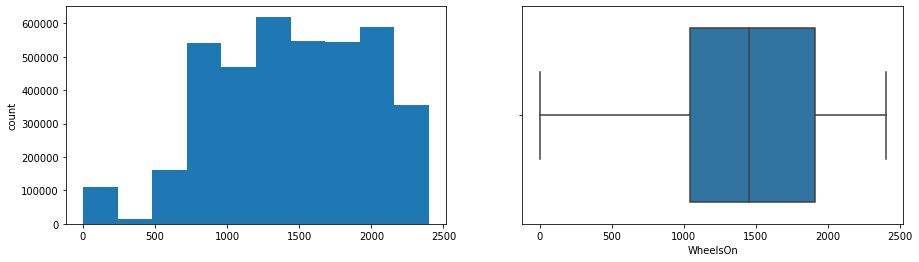

TaxiIn
Skew : 5.07


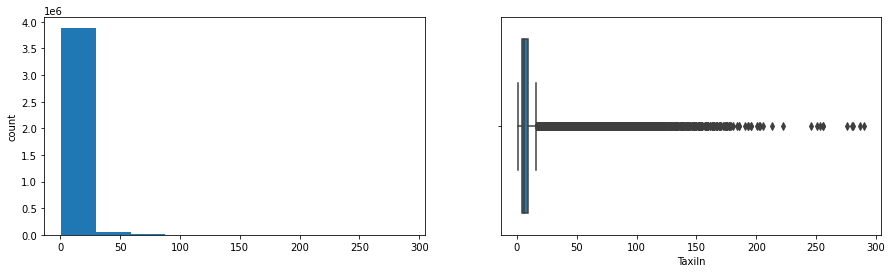

CRSArrTime
Skew : -0.28


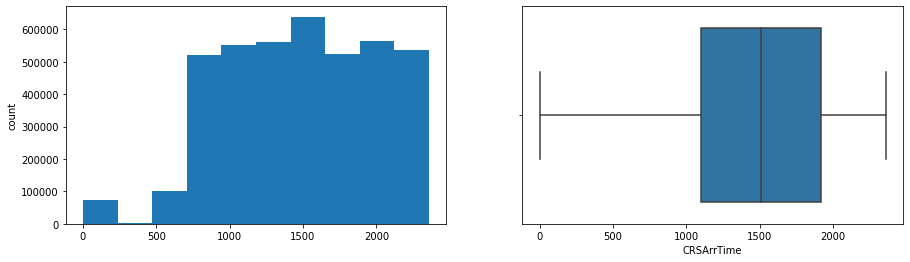

ArrDelay
Skew : 10.38


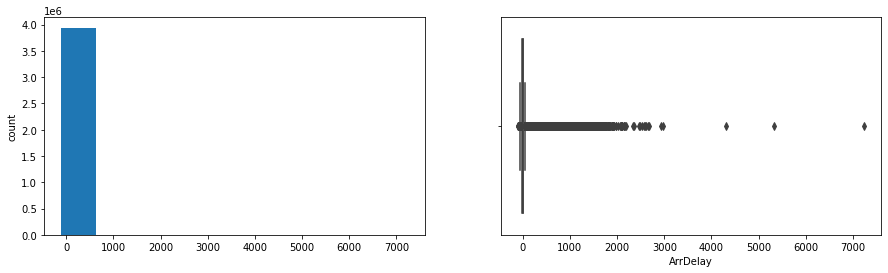

ArrDel15
Skew : 1.38


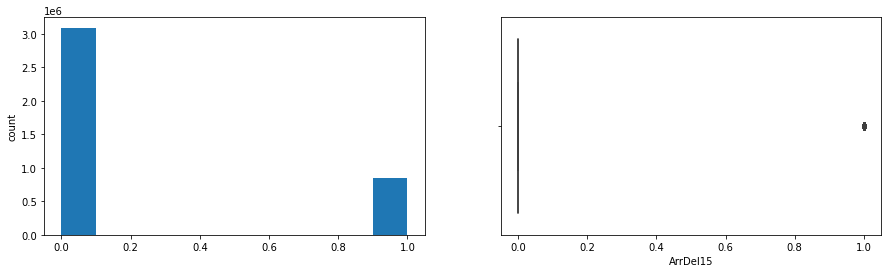

ArrivalDelayGroups
Skew : 2.74


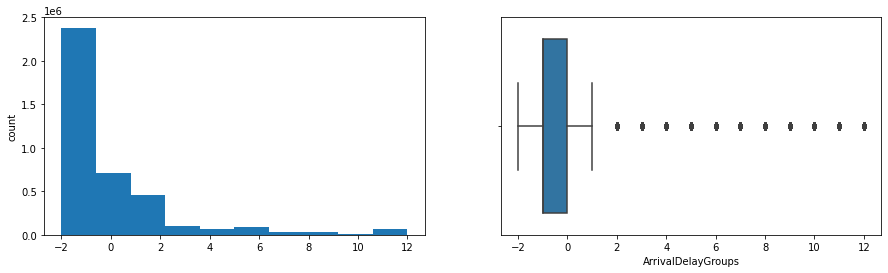

DistanceGroup
Skew : 1.29


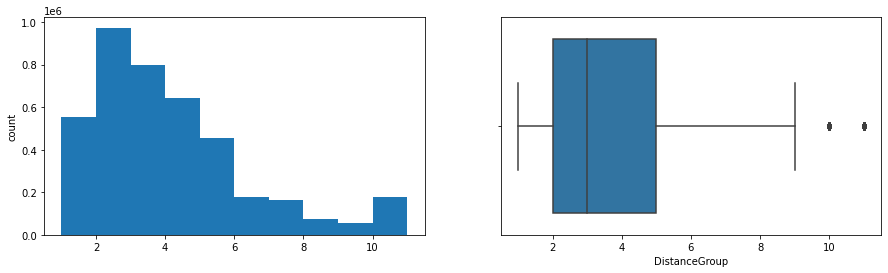

DivAirportLandings
Skew : 65.15


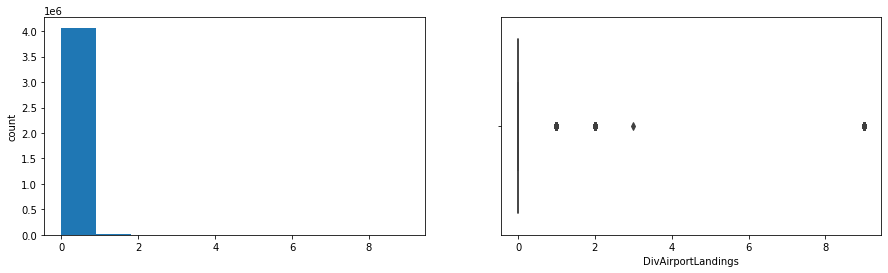

In [38]:
#Univariate Analysis

for col in num_cols:
    print(col)
    print('Skew :', round(flight_data_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    flight_data_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=flight_data_df[col])
    plt.show()
    
# Code reference from https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

# Explore Joint Attributes
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

In [ ]:
# First step to explore any relationships between data would be to do a correlation
flight_data_df.corr()

In [ ]:
#Correlation plot
sns.heatmap(flight_data_df.corr())

In [ ]:
# Very condensed heat correlation map
corrmat = flight_data_df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 #annot_kws={'size': 50}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [ ]:
# Example code for boxplot vs target variable (whatever we decide)
sns.catplot(x="target", y="", data=flight_data_df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs ")
plt.show()

In [ ]:
# Code for analyzing scatterplot relationships 
sns.scatterplot(x="", y="", hue="target", data=flight_data_df, palette="Dark2", s=80)
plt.title("Relationship between 1, 2 and target")
plt.show()

# Explore Attributes and Class
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

# New Fetaures
Are there other features that could be added to the data or created from existing features? Which ones?

 - Average airline cost / minute delayed
 - Average passenger cost / minute delayed
 - Average reimbursement / cancellation

# Modeling

# Exceptional Work

# Sources
1. Ball, M., Barnhart, C., Dresner, M., Hansen, M., Neels, K., Odoni, A., Peterson, E., Sherry, L., Trani, A., & Zou, B. (2010, October). Total Delay Impact Study. isr.umd.edu. https://isr.umd.edu/NEXTOR/pubs/TDI_Report_Final_10_18_10_V3.pdf

2. Olson, E. (2022, December 28). Soutwest cancels another 4,800 flights as its reduced schedule continues. NPR. https://www.npr.org/2022/12/28/1145775020/southwest-airlines-flights-cancellations

3. Investis. (2023, January 6). Southwest Airlines Securities and Exchange Commission Financial Filing. https://otp.tools.investis.com/clients/us/southwest/SEC/sec-show.aspx?Type=html&FilingId=16303107&CIK=0000092380&Index=10000